In [2]:
library(tidyverse)
library(ggrepel)
library(nflreadr)
library(nflplotR)
library(ggplot2)
library(gt)
library(dplyr, warn.conflicts = FALSE)
options(nflreadr.verbose = FALSE)

In [3]:
data <- read_csv('week7_output.csv', show_col_types=FALSE)

New names:
• `` -> `...1`


In [4]:
data$teams <- paste(data$home_team, "vs", data$away_team)

In [5]:
data$win_prob <- paste(data$prob_correct_pred * 100)

In [6]:
p <- ggplot(data, aes(x = prediction, y = teams)) +
    geom_segment(aes(
        x = pmin(total_line, prediction),
        xend = pmax(total_line, prediction),
        y = teams,
        yend = teams,
        color = ifelse(prediction > total_line, "Bet Over", "Bet Under")
      ), linewidth = 2.5, alpha=0.75) +    
    geom_point(aes(color = "Prediction"), size = 3) +
    geom_point(aes(x = total_line, y = teams, color = "Total Line"), size = 3) +
    geom_text(aes(x = prediction, y = teams, label = round(prediction, 1)),
            color = "black", vjust = -1, size = 3) +  # Adjust hjust for label positioning
    geom_text(aes(x = total_line, y = teams, label = round(total_line, 1)),
            color = "#b8860b", vjust = 2, size = 3) +  
    geom_nfl_logos(aes(x = min(total_line) - 10, team_abbr = home_team), 
                 width = 0.08, height = 0.08) +
    geom_nfl_logos(aes(x = min(total_line) - 7.95, team_abbr = away_team), 
                 width = 0.08, height = 0.08) +
    geom_text(aes(x = max(total_line, prediction) + 2, 
                y = teams, 
                label = sprintf("%.1f%% Conf.", prob_correct_pred * 100)), 
            data = data, color = "black", hjust = 0, size = 3) +
    labs(
    title = "Prediction vs. Over Under Line: NFL Week 7",
    x = "Total Points",
    y = NULL,  
    color = NULL 
    ) +
    scale_color_manual(values = c("Prediction" = "black", "Total Line" = "#b8860b",
                                 "Bet Over" = "midnightblue", "Bet Under" = "darkred")) +
    scale_x_continuous(
    breaks = seq(30, max(data$total_line, data$prediction) + 4, by = 2.5),
    limits = c(min(data$total_line) - 10, max(data$total_line, data$prediction) + 4)
    ) +
    theme_minimal() +
    theme(
    axis.text.y = element_blank(),  
    panel.background = element_rect(fill = "grey95", color = "grey95"),
    plot.background = element_rect(fill = "white", color = "white"),
    panel.grid.major = element_line(color = "gray80"),
    panel.grid.minor = element_line(color = "gray90"),
    legend.position = "bottom",  
    plot.title = element_text(hjust = 0.5) 
    )




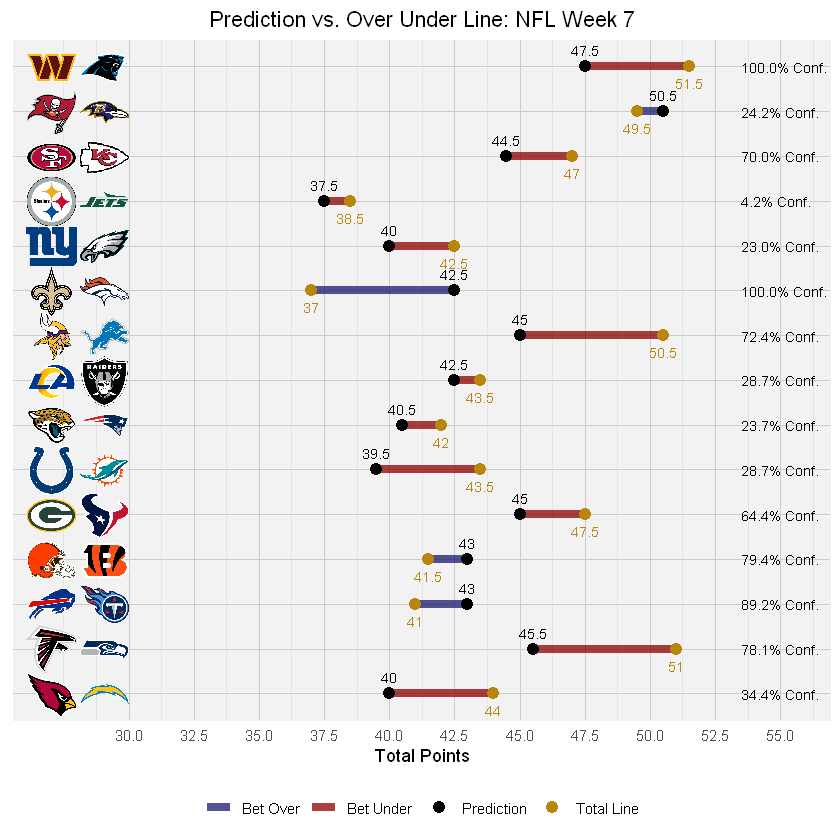

In [7]:
p

In [56]:
a <- ggplot(data, aes(x = prediction, y = teams)) +
    geom_segment(aes(
        x = pmin(total_line, prediction),
        xend = pmax(total_line, prediction),
        y = teams,
        yend = teams,
        color = ifelse(prediction > total_line, "Bet Over", "Bet Under")
      ), linewidth = 2.5, alpha=0.75) +    
    geom_point(aes(color = "Prediction"), size = 3) +
    geom_point(aes(x = total_line, y = teams, color = "Total Line"), size = 3) +
    geom_point(aes(x = actual, y = teams, color = "Actual"), size = 3) +
    geom_text(aes(x = prediction, y = teams, label = round(prediction, 1)),
            color = "black", vjust = -1, size = 3) +  # Adjust hjust for label positioning
    geom_text(aes(x = total_line, y = teams, label = round(total_line, 1)),
            color = "#b8860b", vjust = 2, size = 3) +  
    geom_nfl_logos(aes(x = min(total_line) - 10, team_abbr = home_team), 
                 width = 0.08, height = 0.08) +
    geom_nfl_logos(aes(x = min(total_line) - 7.95, team_abbr = away_team), 
                 width = 0.08, height = 0.08) +
    geom_text(aes(x = max(total_line, prediction) + 2, 
                y = teams, 
                label = sprintf("%.1f%% Conf.", prob_correct_pred * 100)), 
            data = data, color = "black", hjust = 0, size = 3) +
    labs(
    title = "Prediction vs. Over Under Line: NFL Week 5",
    x = "Total Points",
    y = NULL,  
    color = NULL 
    ) +
    scale_color_manual(values = c("Prediction" = "black", "Total Line" = "#b8860b",
                                 "Bet Over" = "midnightblue", "Bet Under" = "darkred",
                                 "Actual" = "blue")) +
    scale_x_continuous(
    breaks = seq(20, max(data$total_line, data$prediction) + 4, by = 2.5),
    limits = c(min(data$total_line) - 10, max(data$total_line, data$prediction) + 4)
    ) +
    theme_minimal() +
    theme(
    axis.text.y = element_blank(),  
    panel.background = element_rect(fill = "grey95", color = "grey95"),
    plot.background = element_rect(fill = "white", color = "white"),
    panel.grid.major = element_line(color = "gray80"),
    panel.grid.minor = element_line(color = "gray90"),
    legend.position = "bottom",  
    plot.title = element_text(hjust = 0.5) 
    )

Warning message:
"Removed 5 rows containing missing values or values outside the scale range (`geom_point()`)."


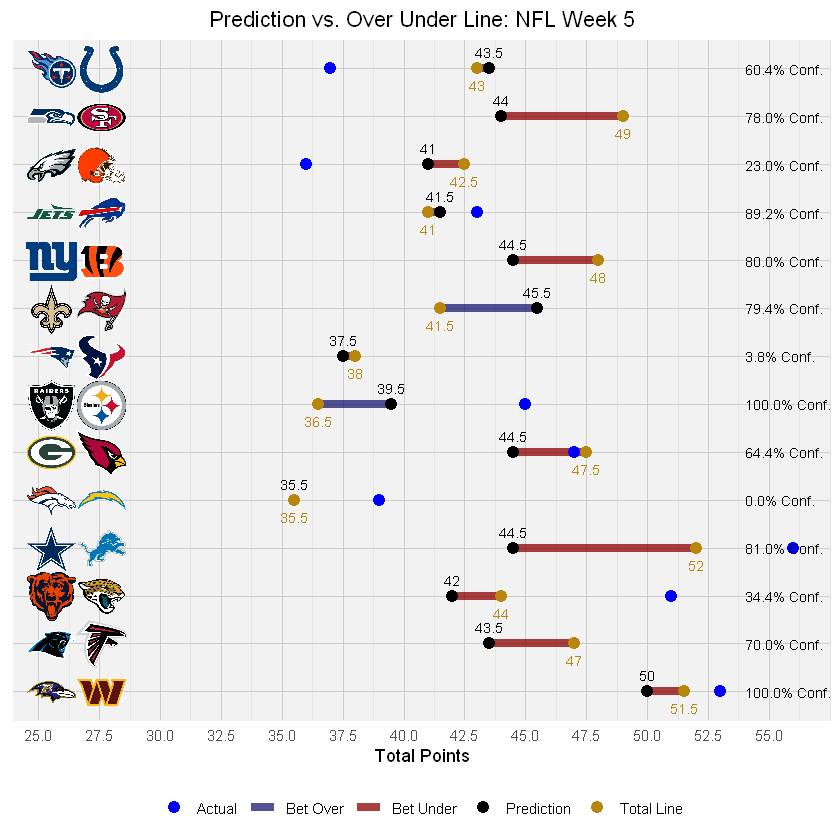

In [57]:
a

In [59]:
ggsave("week_6_actual.png", plot = a, width = 10, height = 8, dpi = 300)

Warning message:
"Removed 5 rows containing missing values or values outside the scale range (`geom_point()`)."


In [8]:
ggsave("nfl_predictions.png", plot = p, width = 10, height = 8, dpi = 300)
